# 11. Sieci neuronowe (Keras)

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2
Epoch 1/15
313/313 [==============================] - 30s 95ms/step - loss: 1.9484 - accuracy: 0.2691 - val_loss: 1.4775 - val_accuracy: 0.4634
Epoch 2/15
313/313 [==============================] - 40s 129ms/step - loss: 1.3577 - accuracy: 0.5087 - val_loss: 1.2645 - val_accuracy: 0.5516
Epoch 3/15
313/313 [==============================] - 34s 109ms/step - loss: 1.1786 - accuracy: 0.5805 - val_loss: 1.1324 - val_accuracy: 0.6025
Epoch 4/15
313/313 [==============================] - 31s 99ms/step - loss: 1.0586 - accuracy: 0.6222 - val_loss: 1.1105 - val_accuracy: 0.6138
Epoch 5/15
313/313 [==============================] - 41s 132ms/step - loss: 0.9590 - accuracy: 0.6609 - val_loss: 1.0037 - val_accuracy: 0.6536
Epoch 6/15
313/313 [==============================] - 37s 118ms/step -

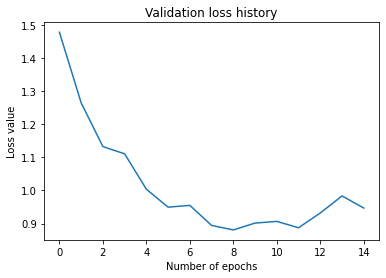

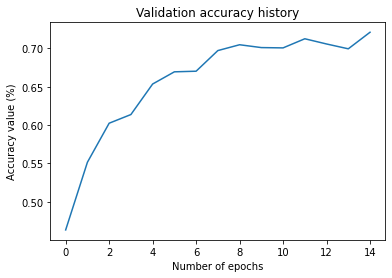

In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam

# Model configuration
batch_size = 128
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
num_classes = 10
epochs = 15
validation_split = 0.2
verbosity = 1
optimizer = Adam()

# Load CIFAR-10 data, so there is no train/test data files included
(input_train, target_train), (input_test, target_test) = cifar10.load_data() 

# Determine shape of the data
input_shape = (img_width, img_height, img_num_channels)

# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

# Normalize data
input_train = input_train / 255
input_test = input_test / 255

# Create the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

# Fit data to model
history = model.fit(input_train, target_train,
            batch_size=batch_size,
            epochs=epochs,
            verbose=verbosity,
            validation_split=validation_split)

# Generate generalization metrics
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Loss: {score[0]}\nAccuracy: {score[1]}')
# Loss and accuracy at a hundred epochs
# Loss: 3.0226852893829346
# Accuracy: 0.6955999732017517

# Visualize history
# Plot history: Loss
plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('Number of epochs')
plt.show()

# Plot history: Accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('Number of epochs')
plt.show()